In [1]:
%matplotlib inline

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Our analysis will encompass key metrics such as;
# Top Hosts Info
# listings per host

In [4]:
# Load in csv
listings_df = pd.read_csv("Resources/listings.csv")
listings_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,138592,https://www.airbnb.com/rooms/138592,20231204023824,2023-12-04,city scrape,Home in San Francisco · ★4.91 · 4 bedrooms · 4...,NaN,The home is walking distance from lots of loca...,https://a0.muscache.com/pictures/039b1662-ff1a...,648553,...,4.91,5.00,4.55,Pending Application,f,1,1,0,0,0.23
1,474107,https://www.airbnb.com/rooms/474107,20231204023824,2023-12-04,city scrape,Home in San Francisco · ★4.91 · 2 bedrooms · 2...,NaN,Excelsior is south of the Mission district and...,https://a0.muscache.com/pictures/181cbeb0-18b7...,2318089,...,4.99,4.76,4.87,STR-0007772,f,1,0,1,0,1.92
2,487019,https://www.airbnb.com/rooms/487019,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.53 · 3 bedro...,NaN,A gourmet hidden gem with spectacular views of...,https://a0.muscache.com/pictures/5789289/7a78c...,2410550,...,4.72,4.36,4.47,STR-0001599,f,1,1,0,0,0.26
3,487499,https://www.airbnb.com/rooms/487499,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.78 · 1 bedro...,NaN,The Mission Dolores area is consider one of th...,https://a0.muscache.com/pictures/12842308/68a6...,1682183,...,4.92,4.85,4.60,NaN,f,1,1,0,0,1.41
4,1163946,https://www.airbnb.com/rooms/1163946,20231204023824,2023-12-04,previous scrape,Condo in San Francisco · 2 bedrooms · 2 beds ·...,NaN,the Mission is a simmering cauldron of culture...,https://a0.muscache.com/pictures/miso/Hosting-...,1918239,...,5.00,4.50,4.50,NaN,f,1,1,0,0,0.02


In [5]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8056 entries, 0 to 8055
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8056 non-null   int64  
 1   listing_url                                   8056 non-null   object 
 2   scrape_id                                     8056 non-null   int64  
 3   last_scraped                                  8056 non-null   object 
 4   source                                        8056 non-null   object 
 5   name                                          8056 non-null   object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         5613 non-null   object 
 8   picture_url                                   8056 non-null   object 
 9   host_id                                       8056 non-null   i

In [6]:
# Listings per host
listings_per_host = ["host_id", "host_name", "host_listings_count", "calculated_host_listings_count", "host_total_listings_count", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms", "room_type"]
listings_per_host_df = listings_df[listings_per_host]
listings_per_host_df

,host_id,host_name,host_listings_count,calculated_host_listings_count,host_total_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,room_type
0,648553,Julie & Brad,1.0,1,5.0,1,0,0,Entire home/apt
1,2318089,Inés,1.0,1,3.0,0,1,0,Private room
2,2410550,Cecile,1.0,1,1.0,1,0,0,Entire home/apt
3,1682183,Daniel,2.0,1,2.0,1,0,0,Entire home/apt
4,1918239,Jen,1.0,1,1.0,1,0,0,Entire home/apt
...,...,...,...,...,...,...,...,...,...
8051,549017117,Zafer,1.0,1,1.0,1,0,0,Entire home/apt
8052,549027756,Nazanina,1.0,1,1.0,1,0,0,Entire home/apt
8053,52178915,Jim,134.0,48,156.0,48,0,0,Entire home/apt
8054,52178915,Jim,134.0,48,156.0,48,0,0,Entire home/apt


In [7]:
# Sorting by host listings count
sorted_df = listings_per_host_df.sort_values(by='calculated_host_listings_count', ascending=False)
sorted_df

,host_id,host_name,host_listings_count,calculated_host_listings_count,host_total_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,room_type
7740,542041520,Allen,265.0,249,281.0,0,248,1,Private room
7714,542041520,Allen,265.0,249,281.0,0,248,1,Private room
7721,542041520,Allen,265.0,249,281.0,0,248,1,Private room
7877,542041520,Allen,265.0,249,281.0,0,248,1,Private room
7718,542041520,Allen,265.0,249,281.0,0,248,1,Private room
...,...,...,...,...,...,...,...,...,...
3775,335930199,Sophie,1.0,1,2.0,1,0,0,Entire home/apt
3777,62992635,Kanchan,6.0,1,11.0,0,1,0,Private room
3783,9774625,Kristina,1.0,1,1.0,1,0,0,Entire home/apt
3784,69261219,Yvonne Jia Yu,1.0,1,1.0,1,0,0,Entire home/apt


In [8]:
# Calculate number of 'Hotel Rooms' listed by each Host

df = pd.DataFrame(sorted_df)

# Pivot the DataFrame to count occurrences of 'Hotel room' for each 'host_id'
pivot_df = df.pivot_table(index='host_id', columns='room_type', aggfunc='size', fill_value=0)

# Extract the count of 'Hotel room' for each 'host_id'
hotel_room_counts = pivot_df['Hotel room'].reset_index(name='hotel_room_count')

hotel_room_counts

,host_id,hotel_room_count
0,1169,0
1,2766,0
2,6267,0
3,7149,0
4,8904,0
...,...,...
3963,547703977,0
3964,548149518,0
3965,548927680,0
3966,549017117,0


In [9]:
# Reorganize columns
new_table = ["host_id", "host_name", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms", "room_type", "calculated_host_listings_count"]
new_table_df = sorted_df[new_table]
new_table_df

,host_id,host_name,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,room_type,calculated_host_listings_count
7740,542041520,Allen,0,248,1,Private room,249
7714,542041520,Allen,0,248,1,Private room,249
7721,542041520,Allen,0,248,1,Private room,249
7877,542041520,Allen,0,248,1,Private room,249
7718,542041520,Allen,0,248,1,Private room,249
...,...,...,...,...,...,...,...
3775,335930199,Sophie,1,0,0,Entire home/apt,1
3777,62992635,Kanchan,0,1,0,Private room,1
3783,9774625,Kristina,1,0,0,Entire home/apt,1
3784,69261219,Yvonne Jia Yu,1,0,0,Entire home/apt,1


In [10]:
# Merge the original DataFrame with the hotel_room_counts DataFrame
merged_df = pd.merge(new_table_df, hotel_room_counts, on='host_id', how='left')
merged_df

,host_id,host_name,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,room_type,calculated_host_listings_count,hotel_room_count
0,542041520,Allen,0,248,1,Private room,249,0
1,542041520,Allen,0,248,1,Private room,249,0
2,542041520,Allen,0,248,1,Private room,249,0
3,542041520,Allen,0,248,1,Private room,249,0
4,542041520,Allen,0,248,1,Private room,249,0
...,...,...,...,...,...,...,...,...
8051,335930199,Sophie,1,0,0,Entire home/apt,1,0
8052,62992635,Kanchan,0,1,0,Private room,1,0
8053,9774625,Kristina,1,0,0,Entire home/apt,1,0
8054,69261219,Yvonne Jia Yu,1,0,0,Entire home/apt,1,0


In [11]:
# Remove duplicate host_id numbers to display each unique Host
unique_host_ids = merged_df.drop_duplicates(subset=['host_id'])
sorted_data = unique_host_ids.sort_values(by='calculated_host_listings_count', ascending=False)
sorted_data

,host_id,host_name,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,room_type,calculated_host_listings_count,hotel_room_count
0,542041520,Allen,0,248,1,Private room,249,0
249,107434423,Blueground,164,0,0,Entire home/apt,164,0
413,4430421,Landmark,154,1,0,Entire home/apt,155,0
568,520931919,Chris,0,148,0,Private room,148,0
716,173206762,Stratford,0,50,0,Private room,61,11
...,...,...,...,...,...,...,...,...
6097,1936623,Trevor,1,0,0,Entire home/apt,1,0
6098,5913788,Steve,1,0,0,Entire home/apt,1,0
6099,168622682,Ceri,1,0,0,Entire home/apt,1,0
6100,172548751,Alex,0,1,0,Private room,1,0


In [12]:
# Reorder Columns
df = pd.DataFrame(sorted_data)

# Get the list of column names
columns = sorted_data.columns.tolist()

# Reorder columns to make the second to last column the last column
new_columns = columns[:-2] + [columns[-1]] + [columns[-2]]

# Reorder DataFrame columns
df = df[new_columns]
df

,host_id,host_name,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,room_type,hotel_room_count,calculated_host_listings_count
0,542041520,Allen,0,248,1,Private room,0,249
249,107434423,Blueground,164,0,0,Entire home/apt,0,164
413,4430421,Landmark,154,1,0,Entire home/apt,0,155
568,520931919,Chris,0,148,0,Private room,0,148
716,173206762,Stratford,0,50,0,Private room,11,61
...,...,...,...,...,...,...,...,...
6097,1936623,Trevor,1,0,0,Entire home/apt,0,1
6098,5913788,Steve,1,0,0,Entire home/apt,0,1
6099,168622682,Ceri,1,0,0,Entire home/apt,0,1
6100,172548751,Alex,0,1,0,Private room,0,1


In [13]:
# Change column names
new = pd.DataFrame(df)

# New column names
new_column_names = ['Host ID', 'Host Name', '#Entire Home/Apt', '#Private Rooms','#Shared Rooms','Room Type','#Hotel Rooms', '#Listings']

new.columns = new_column_names

new

,Host ID,Host Name,#Entire Home/Apt,#Private Rooms,#Shared Rooms,Room Type,#Hotel Rooms,#Listings
0,542041520,Allen,0,248,1,Private room,0,249
249,107434423,Blueground,164,0,0,Entire home/apt,0,164
413,4430421,Landmark,154,1,0,Entire home/apt,0,155
568,520931919,Chris,0,148,0,Private room,0,148
716,173206762,Stratford,0,50,0,Private room,11,61
...,...,...,...,...,...,...,...,...
6097,1936623,Trevor,1,0,0,Entire home/apt,0,1
6098,5913788,Steve,1,0,0,Entire home/apt,0,1
6099,168622682,Ceri,1,0,0,Entire home/apt,0,1
6100,172548751,Alex,0,1,0,Private room,0,1


In [14]:
# Top Hosts
Top_Hosts = pd.DataFrame(new)
# Drop unnecessary columns 
dropped_columns = ['Host ID', 'Room Type']
Top_Hosts = Top_Hosts.drop(columns=dropped_columns)
Top_Hosts.head(50)

,Host Name,#Entire Home/Apt,#Private Rooms,#Shared Rooms,#Hotel Rooms,#Listings
0,Allen,0,248,1,0,249
249,Blueground,164,0,0,0,164
413,Landmark,154,1,0,0,155
568,Chris,0,148,0,0,148
716,Stratford,0,50,0,11,61
777,Rocky,1,54,0,0,55
832,Michael,53,0,0,0,53
885,Suiteness,0,48,0,0,48
887,Live Suite,48,0,0,0,48
890,Jim,48,0,0,0,48


In [15]:
# Top 10 Hosts
Top_Hosts.head(10)

,Host Name,#Entire Home/Apt,#Private Rooms,#Shared Rooms,#Hotel Rooms,#Listings
0,Allen,0,248,1,0,249
249,Blueground,164,0,0,0,164
413,Landmark,154,1,0,0,155
568,Chris,0,148,0,0,148
716,Stratford,0,50,0,11,61
777,Rocky,1,54,0,0,55
832,Michael,53,0,0,0,53
885,Suiteness,0,48,0,0,48
887,Live Suite,48,0,0,0,48
890,Jim,48,0,0,0,48


/var/folders/lp/fs20bjw967l4sm213yk37n_40000gn/T/ipykernel_25156/3725720764.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_listings_per_range = df.groupby('listings_per_host_bins')['#Listings'].sum()


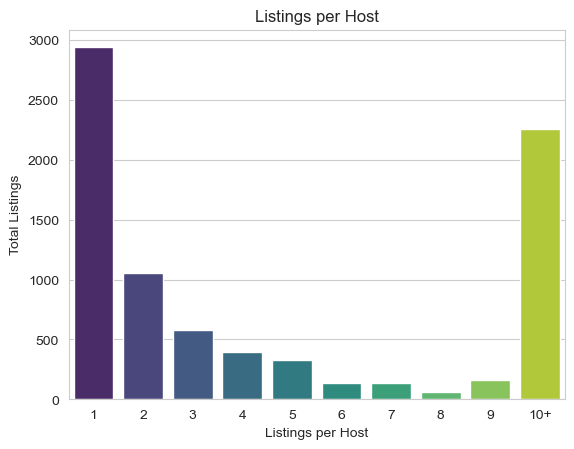

In [16]:
# Listings per Host Bar Chart 

df = pd.DataFrame(Top_Hosts)

# Create bins for listings per host
bins = list(range(1, 11)) + [float('inf')]  # 10+ listings per host

# Bin the data
df['listings_per_host_bins'] = pd.cut(df['#Listings'], bins=bins, right=False)

# Calculate total listings for each range of listings per host
total_listings_per_range = df.groupby('listings_per_host_bins')['#Listings'].sum()

# Use Seaborn style
sns.set_style('whitegrid')

# Plot the bar chart using Seaborn
sns.barplot(x=total_listings_per_range.index.astype(str), y=total_listings_per_range.values, palette='viridis')

# Add labels and title
plt.xlabel('Listings per Host')
plt.ylabel('Total Listings')
plt.title('Listings per Host')

# Change the names of the ticks on the x-axis
new_xticks = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']
plt.xticks(range(len(new_xticks)), new_xticks)

# Show plot
plt.show()

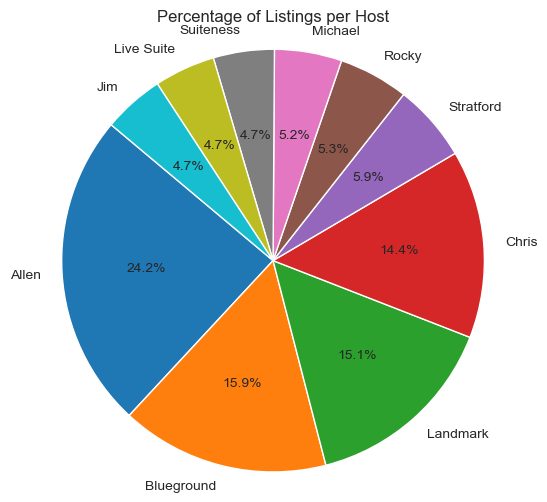

In [17]:
# Percentage of Listings per Host from the Top 10 Hosts Pie Chart

df = pd.DataFrame(Top_Hosts.head(10))

# Calculate total listings
total_listings = df['#Listings'].sum()

# Calculate percentage of listings per host out of total listings
df['percentage_of_total_listings'] = (df['#Listings'] / total_listings) * 100

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(df['percentage_of_total_listings'], labels=df['Host Name'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Listings per Host')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

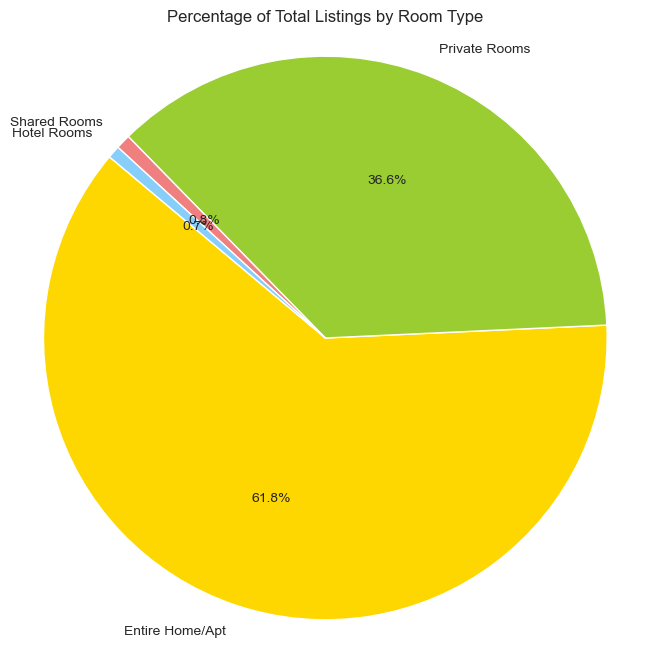

In [18]:
# Percentage of Total Listings by Room Type

data = pd.DataFrame(Top_Hosts)

# Calculate total listings for each category
total_entire_home = sum(data["#Entire Home/Apt"])
total_private_rooms = sum(data["#Private Rooms"])
total_shared_rooms = sum(data["#Shared Rooms"])
total_hotel_rooms = sum(data["#Hotel Rooms"])

# Calculate percentages
percent_entire_home = total_entire_home / sum(data["#Listings"]) * 100
percent_private_rooms = total_private_rooms / sum(data["#Listings"]) * 100
percent_shared_rooms = total_shared_rooms / sum(data["#Listings"]) * 100
percent_hotel_rooms = total_hotel_rooms / sum(data["#Listings"]) * 100

# Pie chart
labels = ['Entire Home/Apt', 'Private Rooms', 'Shared Rooms', 'Hotel Rooms']
sizes = [percent_entire_home, percent_private_rooms, percent_shared_rooms, percent_hotel_rooms]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Percentage of Total Listings by Room Type')
plt.show()

In [19]:
# # Listing per Host Bar Chart

# df = pd.DataFrame(Top_Hosts)

# # Create bins for listings per host
# bins = list(range(1, 11)) + [float('inf')]  # 10+ listings per host

# # Bin the data
# df['listings_per_host_bins'] = pd.cut(df['#Listings'], bins=bins, right=False)

# # Calculate total listings for each range of listings per host
# total_listings_per_range = df.groupby('listings_per_host_bins')['#Listings'].sum()

# # Plot the bar chart
# plt.bar(total_listings_per_range.index.astype(str), total_listings_per_range.values)

# # Add labels and title
# plt.xlabel('Listings per Host')
# plt.ylabel('Total Listings')
# plt.title('Listings per Host')

# # Change the names of the ticks on the x-axis
# new_xticks = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']
# plt.xticks(range(len(new_xticks)), new_xticks)

# # Show plot
# plt.show()